In [3]:
!pip install scikit-image

  Obtaining dependency information for scikit-image from https://files.pythonhosted.org/packages/d4/34/e27bf2bfe7b52b884b49bd71ea91ff81e4737246735ee5ea383314c31876/scikit_image-0.22.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for networkx>=2.8 from https://files.pythonhosted.org/packages/d5/f0/8fbc882ca80cf077f1b246c0e3c3465f7f415439bdea6b899f6b19f61f70/networkx-3.2.1-py3-none-any.whl.metadata
  Obtaining dependency information for imageio>=2.27 from https://files.pythonhosted.org/packages/02/25/66533a8390e3763cf8254dee143dbf8a830391ea60d2762512ba7f9ddfbe/imageio-2.34.0-py3-none-any.whl.metadata
  Obtaining dependency information for tifffile>=2022.8.12 from https://files.pythonhosted.org/packages/cd/0b/33610b4d0d1bb83a6bfd20ed838f52e02a44e9b439116cd4f3d424e81a80/tifffile-2024.2.12-py3-none-any.whl.metadata
  Obtaining dependency information for lazy_loader>=0.3 from https://files.pythonhosted.org/packages/a1/c3/65b3814e15583

## Define a kernel and run convolution over an image

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from skimage import data, color

def apply_convolution(image, kernel):
    """
    Apply 2D convolution to an image using a given kernel.

    Parameters:
    image (2D numpy array): Input image
    kernel (2D numpy array): Convolution kernel

    Returns:
    2D numpy array: Result of convolution
    """
    # Perform 2D convolution
    convolved_image = signal.convolve2d(image, kernel, boundary='symm', mode='same')
    return convolved_image

def generate_random_kernel(size):
    """
    Generates a random kernel for convolution.

    Parameters:
    size (int): The size of the kernel. It will create a square kernel of size x size.

    Returns:
    2D numpy array: A random kernel of specified size.
    """
    # Ensure size is an odd number for a symmetric kernel
    if size % 2 == 0:
        raise ValueError("Kernel size must be an odd number.")

    # Generate a random kernel
    kernel = np.random.rand(size, size) - 0.5  # Subtract 0.5 to have negative values as well

    return kernel


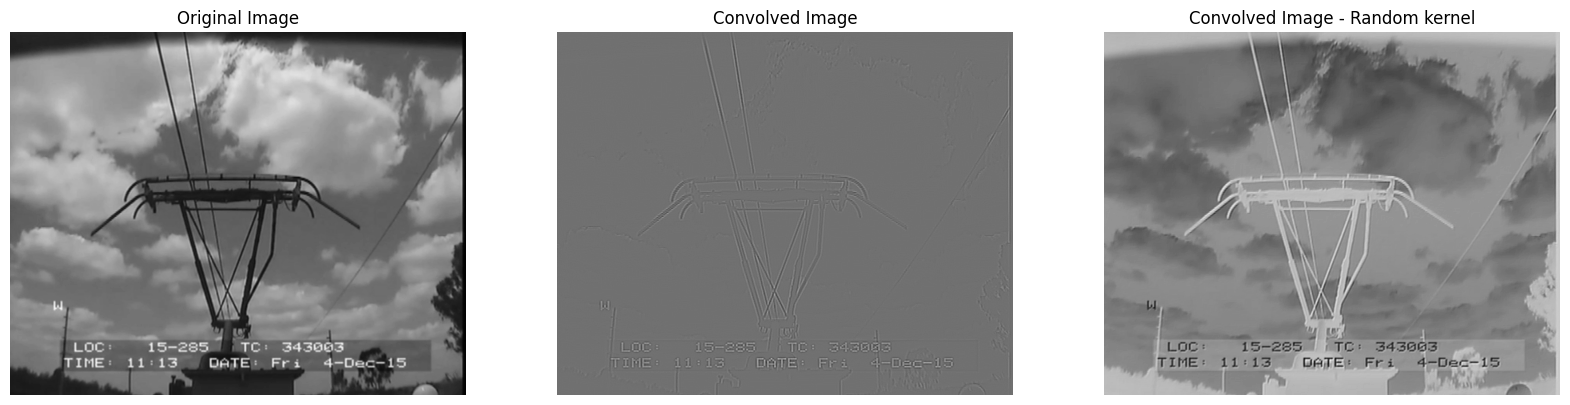

In [85]:
import cv2
image_path = './Panto.png'
img_bgr = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
# Load an example image (grayscale for simplicity)
image = color.rgb2gray(img_rgb)

# Define a simple kernel (e.g., edge detection)
kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])

kernel2 = generate_random_kernel(3)
# Apply the convolution
convolved_image = apply_convolution(image, kernel)
np.random.seed(40)
convolved_image_random_kernel = apply_convolution(image, kernel2)

# Display the original and convolved images
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Convolved Image')
plt.imshow(convolved_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Convolved Image - Random kernel')
plt.imshow(convolved_image_random_kernel, cmap='gray')
plt.axis('off')

plt.show()


# Bluring

In [55]:
def compute_gaussian_kernels(sigma, size):
    """
    Function to compute 1D and 2D Gaussian kernels.

    Parameters:
    sigma (int): Standard deviation of the Gaussian filter.
    size (int): Size of the filter (should be odd for symmetry).

    Returns:
    gaussian_1d (numpy array): 1D Gaussian kernel.
    gaussian_filter (numpy array): 2D Gaussian kernel.
    """
    center = size // 2

    # 1D Gaussian kernel
    x_1d = np.linspace(-center, center, size)
    gaussian_1d = 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-x_1d**2 / (2 * sigma**2))
    gaussian_1d /= gaussian_1d.sum()  # Normalize the 1D Gaussian

    # 2D Gaussian kernel
    x, y = np.mgrid[-center:center+1, -center:center+1]
    gaussian_filter = 1 / (2 * np.pi * sigma**2) * np.exp(-(x**2 + y**2) / (2 * sigma**2))
    gaussian_filter /= gaussian_filter.sum()  # Normalize the 2D filter

    return gaussian_1d, gaussian_filter


def plot_gaussian_1d_2d_3d(sigma, size):
    """
    Function to plot a 1D, 2D, and 3D visualization of a Gaussian filter with consistent axis ranges.
    
    Parameters:
    sigma (int): Standard deviation of the Gaussian filter.
    size (int): Size of the filter (should be odd for symmetry).
    """
    center = size // 2

    # 1D Gaussian
    x_1d = np.linspace(-center, center, size)
    gaussian_1d = 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-x_1d**2 / (2 * sigma**2))
    gaussian_1d /= gaussian_1d.sum()  # Normalize the 1D Gaussian

    # 2D Gaussian Filter
    x, y = np.mgrid[-center:center+1, -center:center+1]
    gaussian_filter = 1 / (2 * np.pi * sigma**2) * np.exp(-(x**2 + y**2) / (2 * sigma**2))
    gaussian_filter /= gaussian_filter.sum()  # Normalize the 2D filter

    # 3D Gaussian
    X, Y = np.meshgrid(x, y)
    Z = 1 / (2 * np.pi * sigma**2) * np.exp(-(X**2 + Y**2) / (2 * sigma**2))
    Z /= Z.sum()

    # Plotting
    plt.figure(figsize=(18, 6))

    # 1D Gaussian plot
    plt.subplot(1, 3, 1)
    plt.plot(x_1d, gaussian_1d)
    plt.title("1D Gaussian Curve")
    plt.xlabel("x")
    plt.ylabel("Value")

    # 2D Gaussian plot
    plt.subplot(1, 3, 2)
    plt.imshow(gaussian_filter, interpolation='none', cmap='jet', extent=[x.min(), x.max(), y.min(), y.max()])
    plt.colorbar()
    plt.title("2D Gaussian Filter")

    # 3D plot
    ax = plt.subplot(1, 3, 3, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='jet')
    ax.set_xlim([x.min(), x.max()])
    ax.set_ylim([y.min(), y.max()])
    plt.title("3D View of 2D Gaussian Function")

    plt.show()



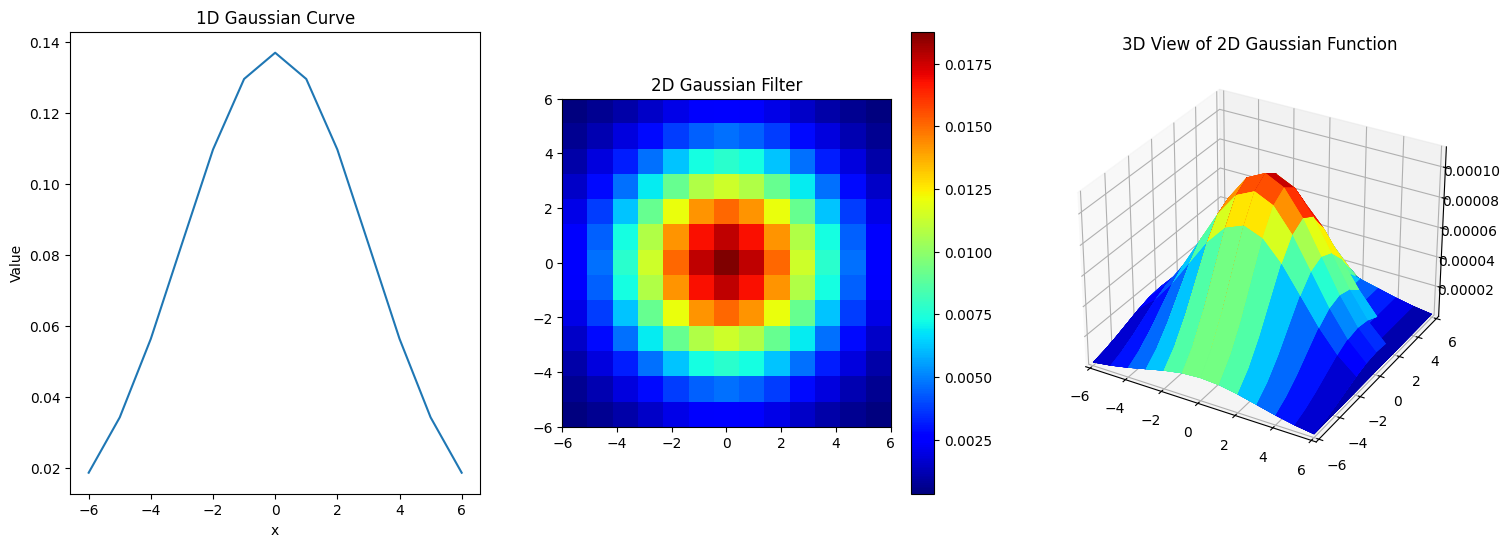

In [56]:
# Example usage with 1D, 2D, and 3D Gaussian plots
plot_gaussian_1d_2d_3d(sigma=3, size=13)

## [1D] Smoothing a noisy signal by convolving it with a Gaussian kernel.

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

def apply_gaussian_to_noisy_sine(gaussian_kernel, freq_sine=1, freq_cos=1, num_points=1000, noise_level=0.2):
    """
    Apply a Gaussian kernel to a noisy sine wave.

    Parameters:
    gaussian_kernel (numpy array): The 1D Gaussian kernel.
    freq_sine (float): Frequency of the sine component.
    freq_cos (float): Frequency of the cosine component.
    num_points (int): Number of points in the sine wave.
    noise_level (float): Level of noise to add to the sine wave.

    Returns:
    smoothed_signal (numpy array): The smoothed sine wave after applying the Gaussian kernel.
    """
    # Generate the sine wave
    x = np.linspace(0, 10*np.pi, num_points)
    sine_wave = np.sin(freq_sine * x) * np.cos(freq_cos * x)

    # Add noise
    noise = np.random.normal(0, noise_level, sine_wave.shape)
    noisy_sine_wave = sine_wave + noise

    # Apply Gaussian filter
    smoothed_signal = convolve(noisy_sine_wave, gaussian_kernel, mode='same')

    return x, noisy_sine_wave, smoothed_signal


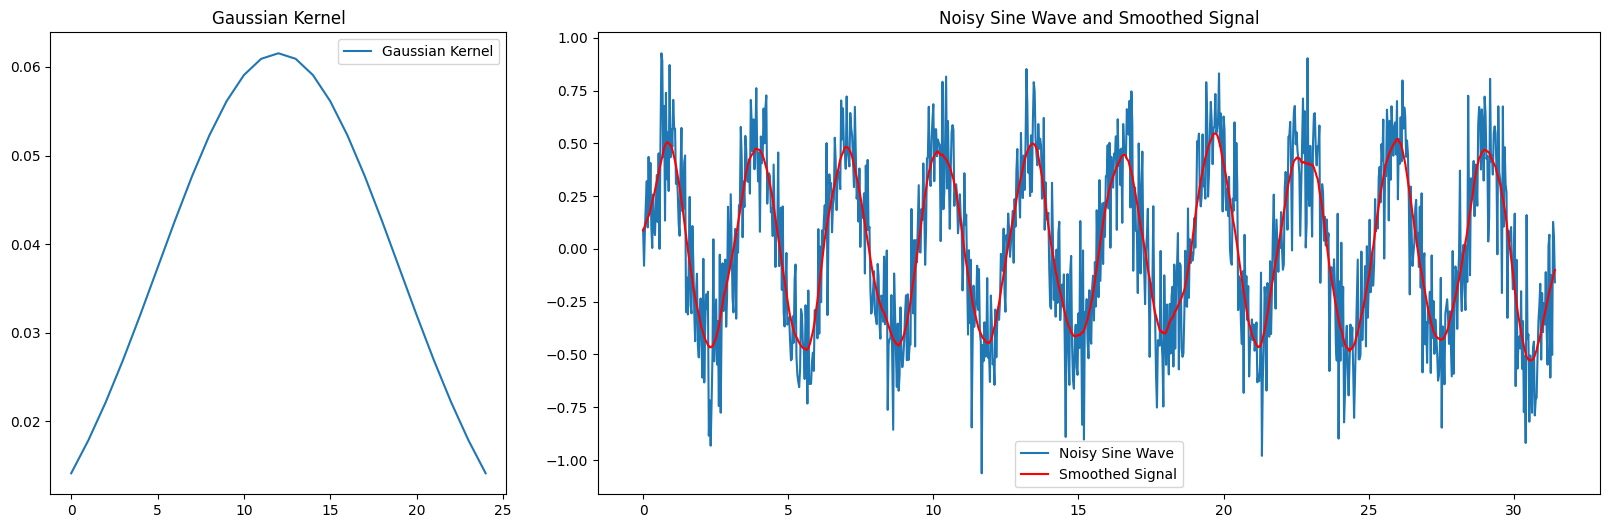

In [69]:
gaussian1d, gaussian2d = compute_gaussian_kernels(sigma=7, size=25)
# Example usage
x, noisy_sine_wave, smoothed_signal = apply_gaussian_to_noisy_sine(gaussian1d)

plt.figure(figsize=(20, 6))

# Plotting the Gaussian signal (1/3 of the width)
plt.subplot(1, 3, 1)
plt.plot(gaussian1d, label='Gaussian Kernel')
plt.title("Gaussian Kernel")
plt.legend()

# Plotting the noisy sine wave and the smoothed signal (2/3 of the width)
plt.subplot(1, 3, (2, 3))
plt.plot(x, noisy_sine_wave, label='Noisy Sine Wave')
plt.plot(x, smoothed_signal, label='Smoothed Signal', color='red')
plt.title("Noisy Sine Wave and Smoothed Signal")
plt.legend()


## [2D] Bluring and image with a 2d kernel

Text(0.5, 1.0, 'Convoluted Image')

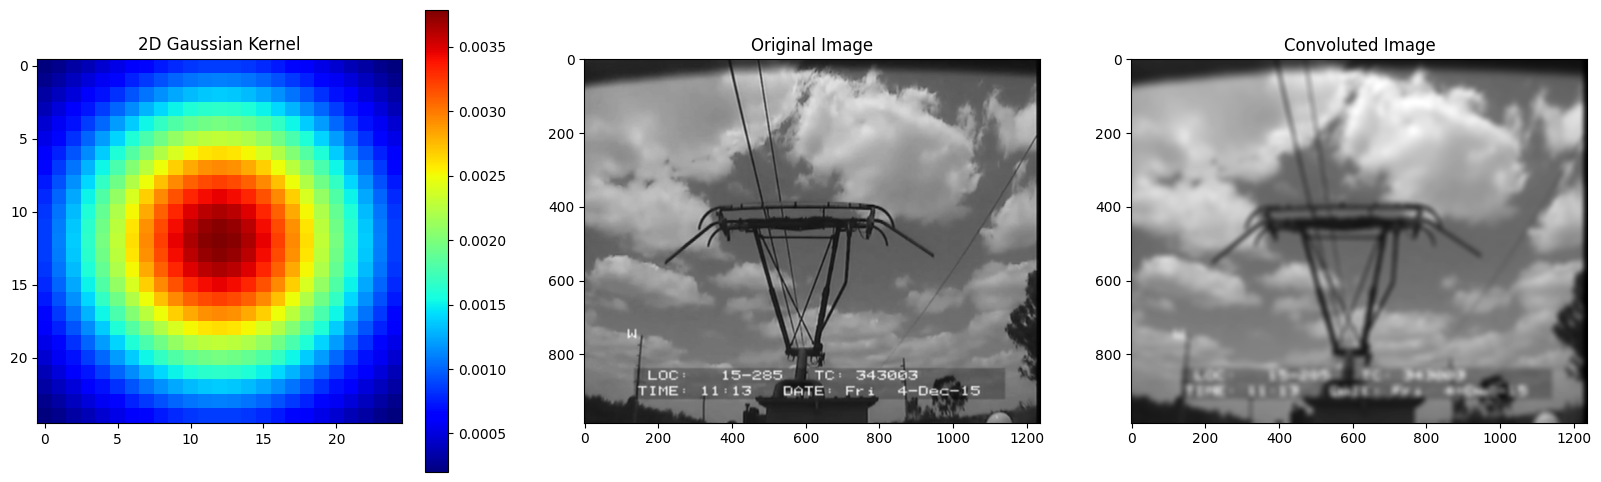

In [72]:
import cv2
from skimage import color, data
from scipy.ndimage import convolve

# Function to apply a 2D Gaussian kernel to an image
def apply_gaussian_2d_to_image(gaussian_kernel, image):
    return convolve(image, gaussian_kernel)

# Load and preprocess the image
image_path = './Panto.png'
img_bgr = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
image = color.rgb2gray(img_rgb)

# Compute Gaussian kernels
gaussian1d, gaussian2d = compute_gaussian_kernels(sigma=7, size=25)

# Apply the 2D Gaussian kernel to the image
convoluted_image = apply_gaussian_2d_to_image(gaussian2d, image)

# Plotting
plt.figure(figsize=(20, 6))

# Plotting the 2D Gaussian kernel
plt.subplot(1, 3, 1)
plt.imshow(gaussian2d, cmap='jet')
plt.title("2D Gaussian Kernel")
plt.colorbar()

# Plotting the original image
plt.subplot(1, 3, 2)
plt.imshow(image, cmap='gray')
plt.title("Original Image")

# Plotting the convoluted image
plt.subplot(1, 3, 3)
plt.imshow(convoluted_image, cmap='gray')
plt.title("Convoluted Image")



## Sharping

Text(0.5, 1.0, 'Sharpened Image')

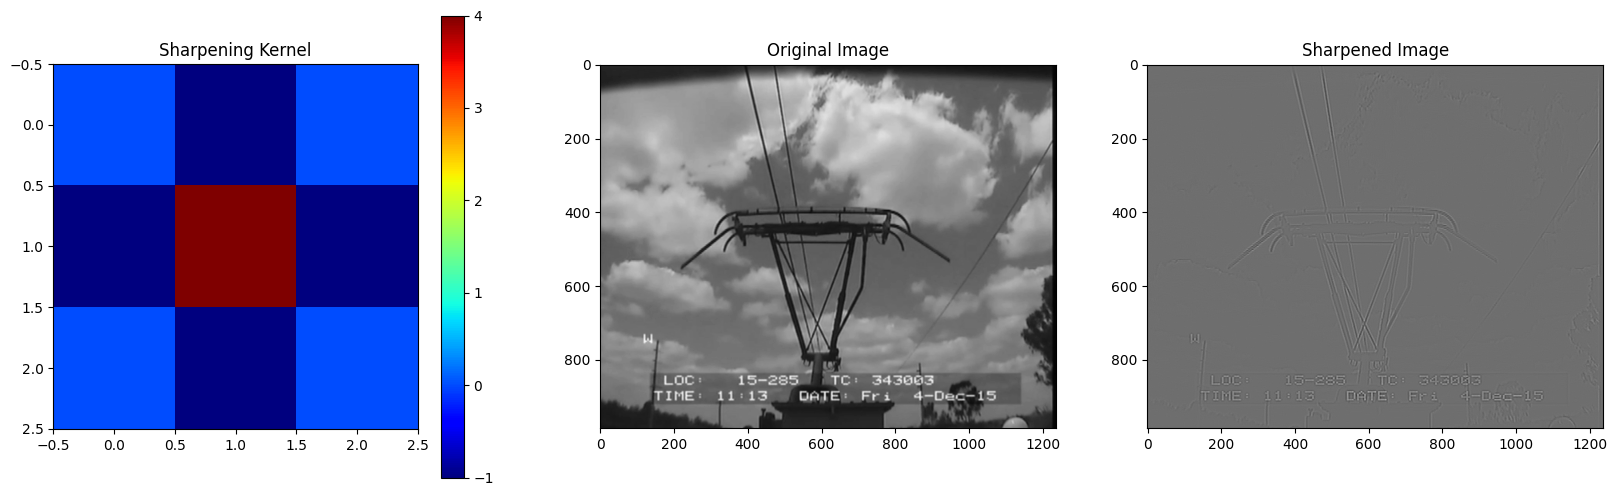

In [76]:
import cv2
from skimage import color
from scipy.ndimage import convolve

# Function to apply a sharpening kernel to an image
def apply_sharpening_kernel_to_image(sharpening_kernel, image):
    return convolve(image, sharpening_kernel)

# Sharpening kernel (Laplacian)
sharpening_kernel = np.array([[ 0, -1,  0],
                              [-1,  4, -1],
                              [ 0, -1,  0]])

# Load and preprocess the image
image_path = './Panto.png'  # Update this path
img_bgr = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
image = color.rgb2gray(img_rgb)

# Apply the sharpening kernel to the image
sharpened_image = apply_sharpening_kernel_to_image(sharpening_kernel, image)

# Plotting
plt.figure(figsize=(20, 6))

# Plotting the sharpening kernel
plt.subplot(1, 3, 1)
plt.imshow(sharpening_kernel, cmap='jet', interpolation='none')
plt.title("Sharpening Kernel")
plt.colorbar()

# Plotting the original image
plt.subplot(1, 3, 2)
plt.imshow(image, cmap='gray')
plt.title("Original Image")

# Plotting the sharpened image
plt.subplot(1, 3, 3)
plt.imshow(sharpened_image, cmap='gray')
plt.title("Sharpened Image")



## Normalise Image

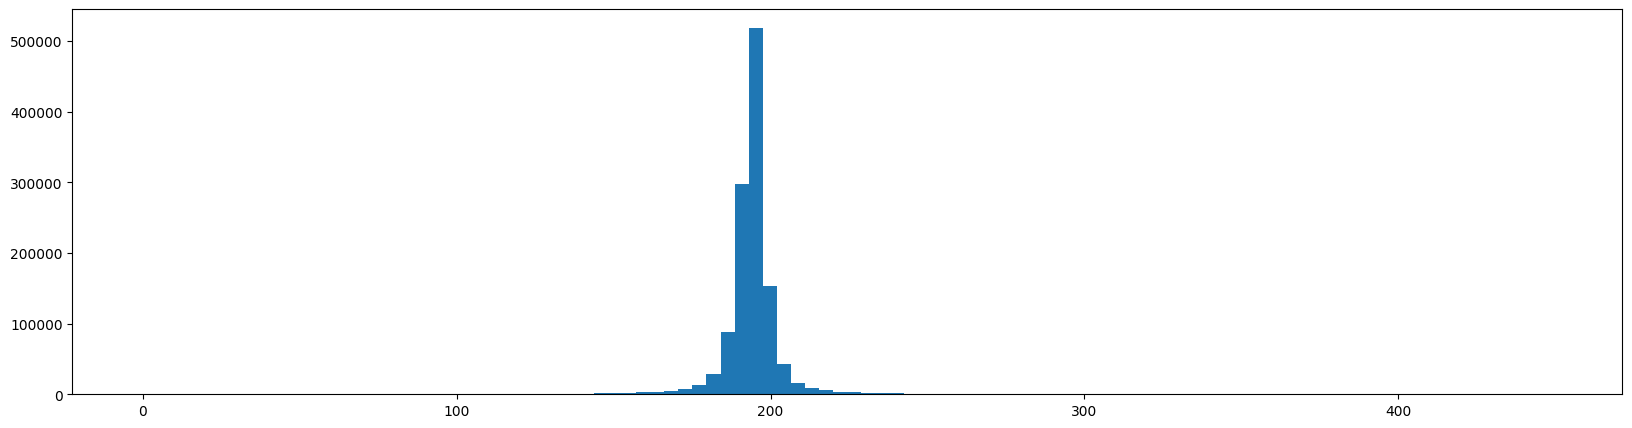

In [87]:

nomr = 255*(sharpened_image - sharpened_image.min())/sharpened_image.max()
plt.figure(figsize=(20,5))
a = plt.hist(nomr.flatten(), bins=100)


## Thresholding

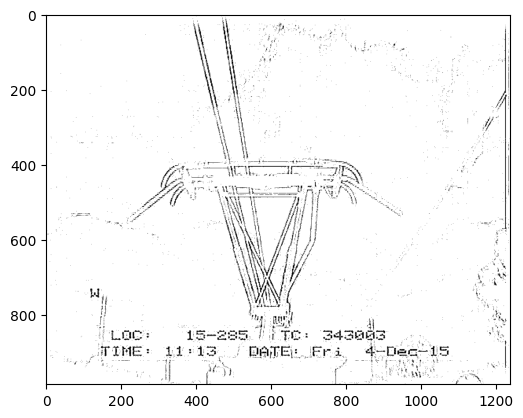

In [88]:

thres = np.where(nomr > 210, 0, 1)
plt.imshow(thres, cmap='gray')